### Run some statistical tests:

In [2]:
from scipy.stats import ttest_ind
import numpy as np

In [3]:
def t_test(data1, data2, equal_var=True):
    stat, p = ttest_ind(data1, data2, equal_var=equal_var)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('p above significance level (fail to reject H0)')
    else:
        print('p below significance level (reject H0)')

In [4]:
acc1 = np.loadtxt('models/keras_logfile_lstm128.txt', dtype=float)
acc2 = np.loadtxt('models/keras_logfile_conv128.txt', dtype=float)

In [5]:
t_test(acc1, acc2)

Statistics=-0.417, p=0.682
p above significance level (fail to reject H0)


In [6]:
acc1.mean()

24.519599999999997

In [7]:
acc2.mean()

24.935099999999995

### Make some nice graphs:

In [12]:
from train import class_report
confusion = class_report(embedding='new_bert', ckpt='models/new_bert1_weights.10-1.34.hdf5')
confusion = np.asarray(confusion)

Confusion Matrix
[[0.19272727 0.67636364 0.02909091 0.10181818 0.        ]
 [0.08225806 0.69193548 0.03064516 0.19354839 0.0016129 ]
 [0.01851852 0.51587302 0.06878307 0.38095238 0.01587302]
 [0.0059761  0.19721116 0.05577689 0.58964143 0.15139442]
 [0.00511509 0.10997442 0.01790281 0.54475703 0.32225064]]
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       275
           1       0.45      0.69      0.55       620
           2       0.30      0.07      0.11       378
           3       0.37      0.59      0.45       502
           4       0.60      0.32      0.42       391

    accuracy                           0.43      2166
   macro avg       0.44      0.37      0.36      2166
weighted avg       0.43      0.43      0.39      2166



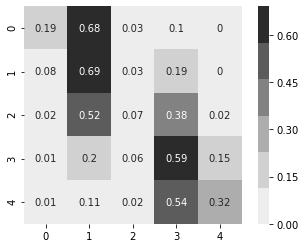

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.heatmap(np.around(confusion, decimals=2), annot=True, square=True, cmap=sns.color_palette("Greys"))